In [1]:
import os


In [2]:
base_dir = r"C:\Users\Saloni Deshmukh\Desktop\desia_eye"
folders = ['glaucoma', 'normal']


In [31]:

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    
    if not os.path.exists(folder_path):
        print(f" Folder not found: {folder_path}")
        continue

    images = os.listdir(folder_path)
    images.sort()  # Optional: for consistent ordering

    print(f"\n🔁 Renaming files in folder: {folder}")
    for idx, filename in enumerate(images, start=1):
        file_ext = os.path.splitext(filename)[1]  # .jpg, .jpeg, .png, etc.
        new_name = f"{folder}_{str(idx).zfill(3)}{file_ext}"

        src = os.path.join(folder_path, filename)
        dst = os.path.join(folder_path, new_name)

        try:
            os.rename(src, dst)
            print(f" {filename} → {new_name}")
        except Exception as e:
            print(f" Error renaming {filename}: {e}")

print("\n All files renamed successfully!")



🔁 Renaming files in folder: glaucoma
 glaucoma_001.jpg → glaucoma_001.jpg
 glaucoma_002.jpg → glaucoma_002.jpg
 glaucoma_003.jpg → glaucoma_003.jpg
 glaucoma_004.jpg → glaucoma_004.jpg
 glaucoma_005.jpg → glaucoma_005.jpg
 glaucoma_006.jpg → glaucoma_006.jpg
 glaucoma_007.jpg → glaucoma_007.jpg
 glaucoma_008.jpg → glaucoma_008.jpg
 glaucoma_009.jpg → glaucoma_009.jpg
 glaucoma_010.jpg → glaucoma_010.jpg
 glaucoma_011.jpg → glaucoma_011.jpg
 glaucoma_012.jpg → glaucoma_012.jpg
 glaucoma_013.jpg → glaucoma_013.jpg
 glaucoma_014.jpg → glaucoma_014.jpg
 glaucoma_015.jpg → glaucoma_015.jpg
 glaucoma_016.jpg → glaucoma_016.jpg
 glaucoma_017.jpg → glaucoma_017.jpg
 glaucoma_018.jpg → glaucoma_018.jpg
 glaucoma_019.jpg → glaucoma_019.jpg
 glaucoma_020.jpg → glaucoma_020.jpg
 glaucoma_021.jpg → glaucoma_021.jpg
 glaucoma_022.jpg → glaucoma_022.jpg
 glaucoma_023.jpg → glaucoma_023.jpg
 glaucoma_024.jpg → glaucoma_024.jpg
 glaucoma_025.jpg → glaucoma_025.jpg
 glaucoma_026.jpg → glaucoma_026.jpg


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:
base_dir = r"C:\Users\Saloni Deshmukh\Desktop\desia_eye"
categories = ['glaucoma', 'normal']
IMG_SIZE = 224  # for VGG16


In [6]:
def load_sample_images(num_images_per_class=2):
    data = []
    
    for category in categories:
        folder_path = os.path.join(base_dir, category)
        images = os.listdir(folder_path)[:num_images_per_class]  # Only few for demo

        for img_name in images:
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
            data.append((img_rgb, img_resized, category, img_name))
    
    return data

sample_data = load_sample_images()


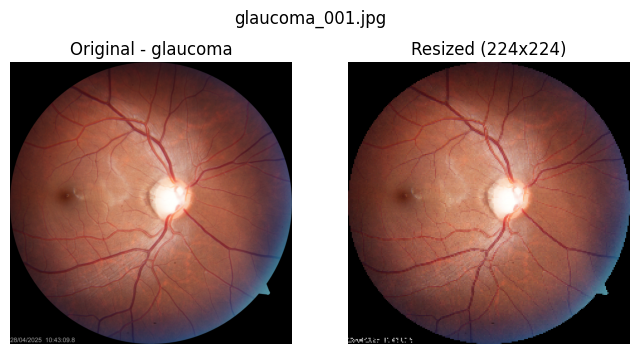

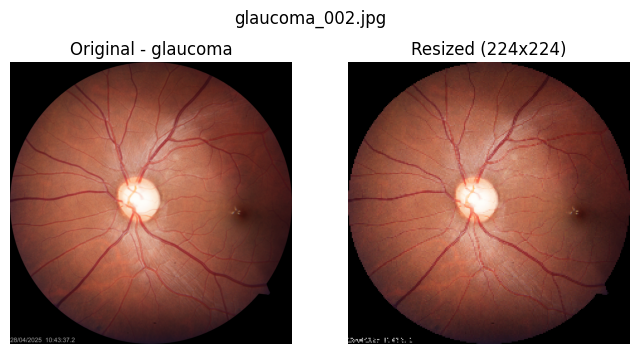

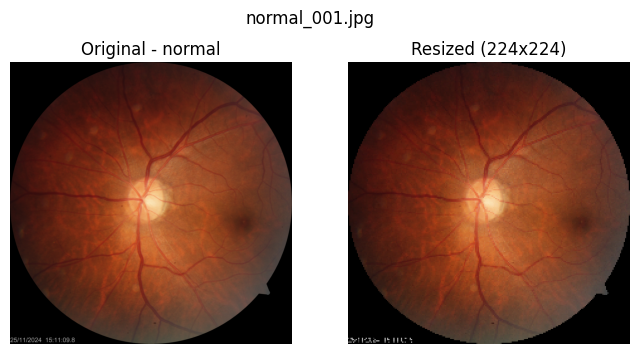

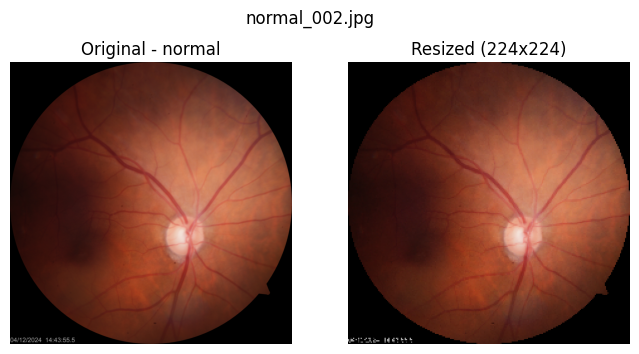

In [7]:
def show_before_after(images_data):
    for orig, resized, label, name in images_data:
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(orig)
        plt.title(f"Original - {label}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(resized)
        plt.title(f"Resized (224x224)")
        plt.axis('off')

        plt.suptitle(name)
        plt.show()

show_before_after(sample_data)


In [30]:
X = []
y = []

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    images = os.listdir(folder_path)

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0  # Normalize

        X.append(img)
        y.append(idx)

X = np.array(X)
y = np.array(y)

print(f" Total images: {len(X)} | Shape: {X.shape}")



 Total images: 142 | Shape: (142, 224, 224, 3)


In [29]:
from sklearn.utils import shuffle


X_glaucoma = X[y == 0][:30]
y_glaucoma = y[y == 0][:30]

X_normal = X[y == 1][:30]
y_normal = y[y == 1][:30]

X_balanced = np.concatenate([X_glaucoma, X_normal], axis=0)
y_balanced = np.concatenate([y_glaucoma, y_normal], axis=0)

X_balanced, y_balanced = shuffle(X_balanced, y_balanced, random_state=42)

print(f" Balanced Dataset Shape: {X_balanced.shape}")


 Balanced Dataset Shape: (60, 224, 224, 3)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f" Training set: {X_train.shape}, Testing set: {X_test.shape}")


 Training set: (48, 224, 224, 3), Testing set: (12, 224, 224, 3)


In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in vgg.layers:
    layer.trainable = False

x = vgg.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4512 - loss: 0.7873 - val_accuracy: 0.7500 - val_loss: 0.5021
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7223 - loss: 0.5220 - val_accuracy: 0.8333 - val_loss: 0.4088
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7432 - loss: 0.5264 - val_accuracy: 0.9167 - val_loss: 0.3096
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8283 - loss: 0.3513 - val_accuracy: 0.9167 - val_loss: 0.2773
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9113 - loss: 0.2732 - val_accuracy: 0.9167 - val_loss: 0.2501
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8378 - loss: 0.3686 - val_accuracy: 0.9167 - val_loss: 0.2360
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8595 - loss: 0.2543 - val_accuracy: 0.9167 - val_loss: 0.2198
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8378 - loss: 0.2929 - val_accuracy: 0.9167 - val_loss: 0.2244
Epoch 9/10
6

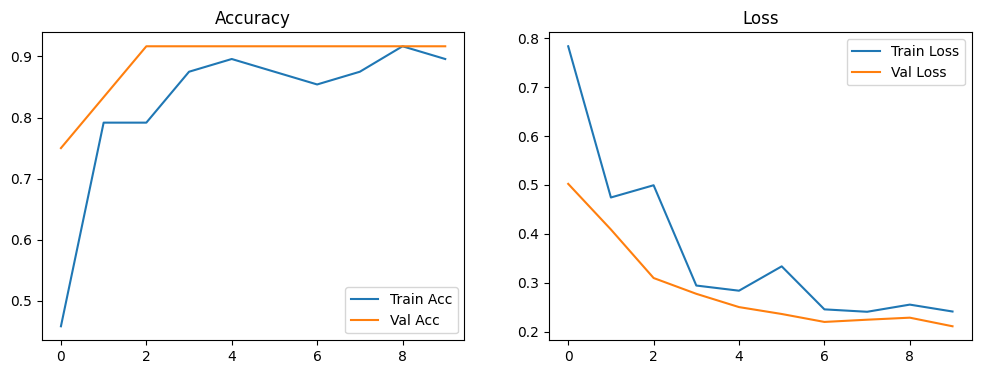

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


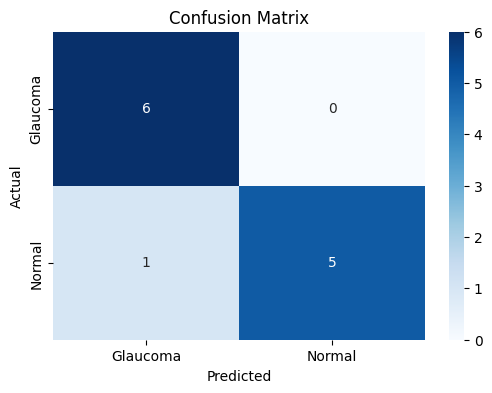

              precision    recall  f1-score   support

    Glaucoma       0.86      1.00      0.92         6
      Normal       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict probabilities
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int").flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Glaucoma', 'Normal'], yticklabels=['Glaucoma', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=['Glaucoma', 'Normal']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


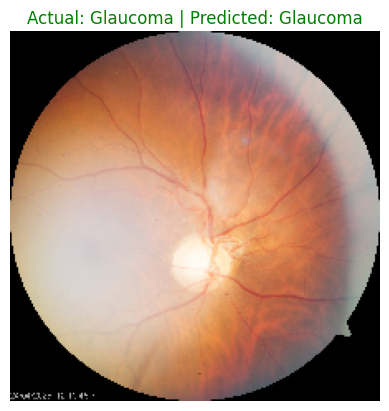

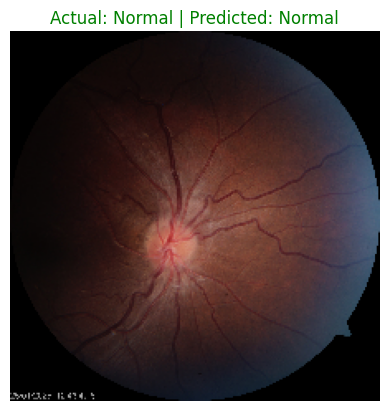

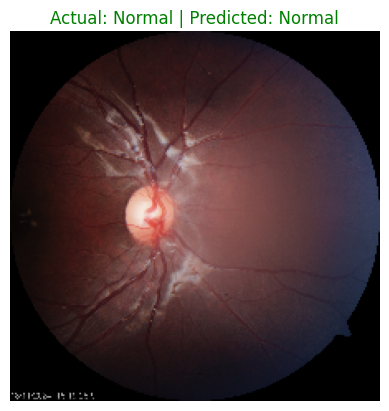

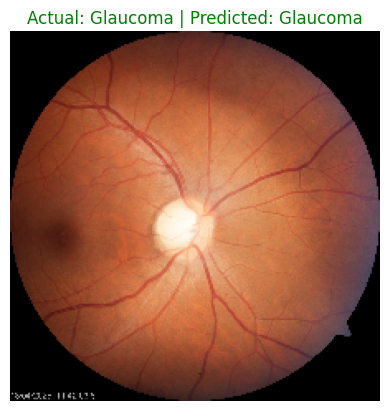

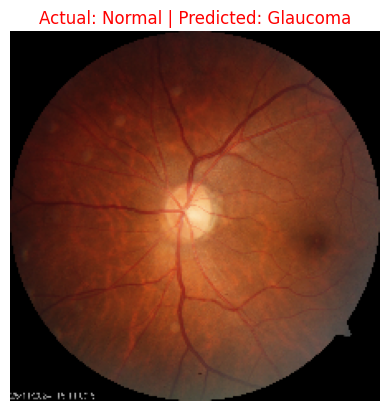

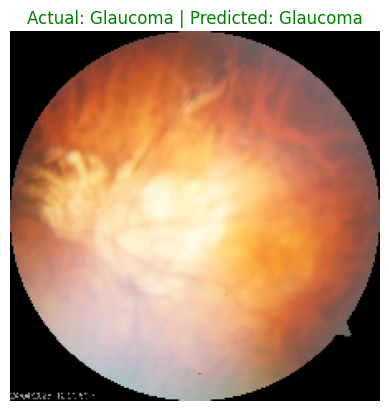

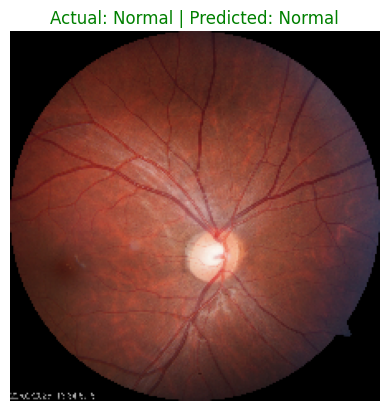

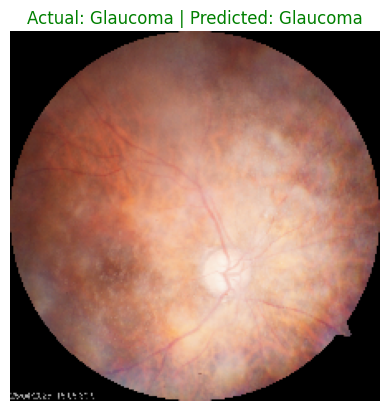

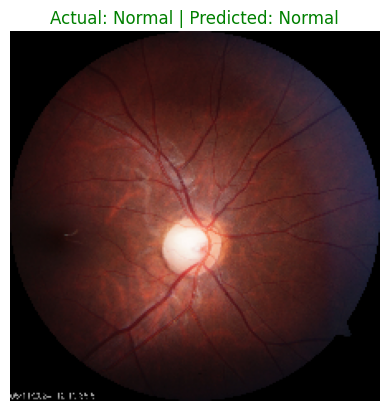

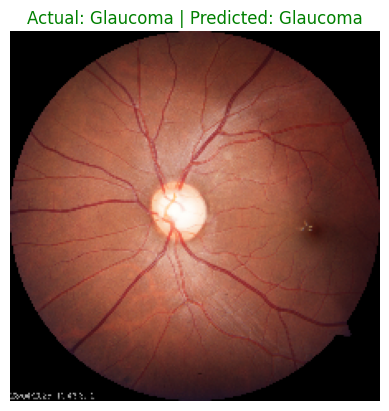

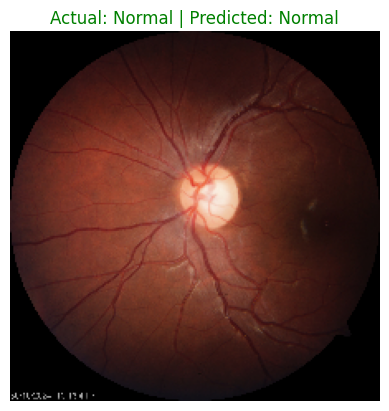

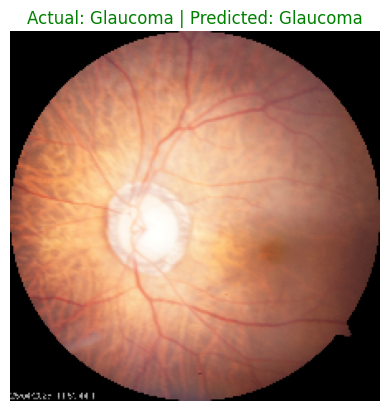

In [23]:
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int").flatten()

# Display results
for i in range(len(X_test)):
    plt.imshow(X_test[i])
    plt.axis('off')
    actual = "Glaucoma" if y_test[i] == 0 else "Normal"
    predicted = "Glaucoma" if y_pred[i] == 0 else "Normal"
    color = "green" if actual == predicted else "red"
    plt.title(f"Actual: {actual} | Predicted: {predicted}", color=color)
    plt.show()


In [26]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f" Test Loss: {loss:.4f}")
print(f" Test Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9167 - loss: 0.2109
 Test Loss: 0.2109
 Test Accuracy: 91.67%
